In [24]:
from google.colab import files
uploaded = files.upload()
!pip install git+https://github.com/tensorflow/docs
!pip install tokenizers

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-h3uz1cw4
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-h3uz1cw4
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.04df4b1d50e0016b80ca295e2117b92757c8040ed_-cp37-none-any.whl size=150907 sha256=74a0baed31773e0f69dbf9b4ed2fb0dba787f5a09aed5a8d0ffba92984d16cab
  Stored in directory: /tmp/pip-ephem-wheel-cache-uil1a2u8/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [25]:
#https://stackoverflow.com/questions/43697240/how-can-i-split-a-dataset-from-a-csv-file-for-training-and-testing


from sklearn.model_selection import train_test_split
import numpy as np
from numpy import genfromtxt
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd


#loading in file, removing header
df = np.loadtxt('clean_aug_train.csv', delimiter= "," , skiprows=1)

#print (df.shape)
df[0:5, :]

#saving target values
y_true = df[:,2]

#removing target values from file
df = np.delete(df, 2, 1)

#using stratify to try to equally distribute based off target column of clean csv
#shuffle csv and split so train gets 85 percent, test 15
x_train, test_df, y_train, y_test = train_test_split(df, y_true,
                                                    test_size = 0.15,
                                                    stratify = y_true,
                                                    random_state = 42,
                                                    shuffle = True)

train_df, cv_df,  y_train, y_cv = train_test_split(x_train, y_train,
                                                    test_size = 0.15,
                                                    stratify =y_train,
                                                    random_state = 42,
                                                    shuffle = True)
#train variables
train_df.shape
y_train.shape

#cv variables
cv_df.shape
y_cv.shape



(2443,)

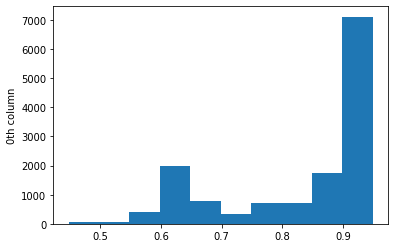

In [26]:
import matplotlib.pyplot as plt

plt.hist(train_df[:, 0])
plt.ylabel('0th column')
plt.show()


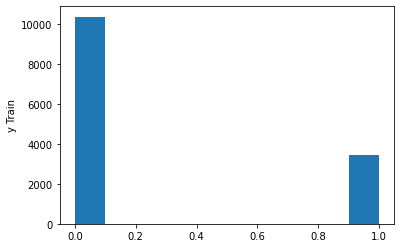

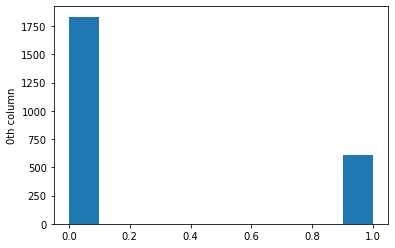

In [27]:
import matplotlib.pyplot as plt

plt.hist(y_train)
plt.ylabel('y Train')
plt.show()

import matplotlib.pyplot as plt

plt.hist(y_cv)
plt.ylabel('0th column')
plt.show()

[8.29559610e-01 6.48231214e+01 6.35838150e-02 6.90390173e-01
 1.09826590e-02 7.20447977e-01 2.79552023e-01 1.95953757e-01
 6.34393064e-02 7.20447977e-01 6.01372832e-01 2.27312139e-01
 1.24060694e-01 2.27601156e-02 3.43930636e-02 1.19219653e-02
 4.77601156e-02 7.55924855e-01 2.83236994e-02 5.11560694e-02
 3.49710983e-02 2.52890173e-02 2.09537572e-02 3.20809249e-02
 3.57658960e-02 2.57225434e-02 1.77023121e-02 1.43786127e-02
 1.54624277e-02 5.91040462e-02 7.58670520e-03 6.95086705e-02
 7.40606936e-02 7.31936416e-02 6.43786127e-02 5.41907514e-02
 4.17630058e-02 5.13005780e-02 2.68063584e-02 1.72832370e-01
 1.34393064e-01 6.90028902e-02 1.07803468e-01 1.60332370e-01
 4.54479769e-02 2.86849711e-02 6.96531792e-02 7.68063584e-02
 3.09971098e-02 5.37572254e-02 2.71676301e-02 6.64739884e-03
 5.24566474e-02 5.11199422e-01 4.15462428e-01 1.51011561e-01
 5.33959538e-02 5.61416185e-02 1.71965318e-01 1.29768786e-01]
[ 0.12301985 59.4003738   0.24401007  0.46233276  0.10422111  0.44877911
  0.4487791

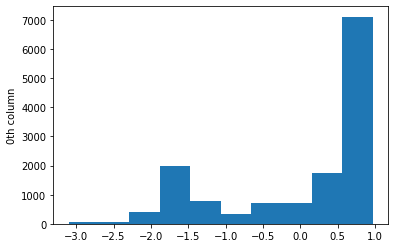

In [28]:
#standardization
mean = train_df.mean(axis = 0)

train_df -= mean
std = train_df.std(axis = 0)
train_df/=std

cv_df -= mean
cv_df /=std

print (mean)
print (std)


plt.hist(train_df[:, 0])
plt.ylabel('0th column')
plt.show()


In [29]:
#review dimensions
print (train_df.shape)
print (y_train.shape)

print(cv_df.shape)
print(y_cv.shape)

print(train_df[0:3,])
print(y_train[0:3])

print(cv_df[0:3,])
print(y_cv[0:3])

(13840, 60)
(13840,)
(2443, 60)
(2443,)
[[ 0.78394173  0.05348247 -0.26057865 -1.49327548 -0.10537845 -1.60535096
   1.60535096  2.02564677 -0.26026229 -1.60535096  0.81416334 -0.542387
  -0.37633975 -0.15261128 -0.18872752 -0.1098445  -0.22395435  0.56822778
  -0.17073171 -0.23219411 -0.19036385 -0.16107497 -0.14629496 -0.18205555
  -0.19259425 -0.16248588 -0.13424355 -0.12078234 -0.12532067 -0.25063274
  -0.08743399 -0.27331491  3.53587882 -0.2810232  -0.26231356 -0.23936509
  -0.20876583 -0.23253954 -0.16596606 -0.4571048  -0.39402889 -0.27224473
   2.87682801 -0.43697531 -0.21820137 -0.17184906 -0.27362012 -0.28843781
  -0.17885376 -0.23835109  5.98402128 -0.08180393 -0.23528851 -1.02265541
   1.18615198 -0.42174914 -0.23750349 -0.24388722 -0.45571799 -0.38616045]
 [ 0.73516911 -1.02395183 -0.26057865  0.6696688  -0.10537845  0.62291675
  -0.62291675 -0.49366949 -0.26026229  0.62291675 -1.22825476  1.84370202
  -0.37633975 -0.15261128 -0.18872752 -0.1098445  -0.22395435  0.56822778

In [30]:
#building nn model
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()

#Output Layer
    
model.add(Dense(8, input_dim = len(train_df[0,:]), activation = 'relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
#model.add(Dense(1, activation='softmax'))
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 488       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
#compile
model.compile(loss= 'binary_crossentropy', optimizer='rmsprop', metrics = ['accuracy'] )

In [32]:
#train model
from keras.callbacks import EarlyStopping, ModelCheckpoint


callback_a = ModelCheckpoint(filepath = 'my_best_model.hdf5', monitor = 'val_loss', save_best_only = True, save_weights_only=True)
callback_b = EarlyStopping(monitor= 'val_loss', mode = 'min', patience= 20)

In [33]:

history = model.fit(train_df, y_train, validation_data = (cv_df, y_cv), epochs= 256, batch_size = 10, callbacks=[callback_a, callback_b])

Epoch 1/256
1384/1384 [==============================] - 3s 1ms/step - loss: 0.5575 - accuracy: 0.7438 - val_loss: 0.4875 - val_accuracy: 0.7556
Epoch 2/256
1384/1384 [==============================] - 2s 1ms/step - loss: 0.4921 - accuracy: 0.7533 - val_loss: 0.4687 - val_accuracy: 0.7732
Epoch 3/256
1384/1384 [==============================] - 2s 1ms/step - loss: 0.4818 - accuracy: 0.7679 - val_loss: 0.4671 - val_accuracy: 0.7650
Epoch 4/256
1384/1384 [==============================] - 2s 1ms/step - loss: 0.4810 - accuracy: 0.7734 - val_loss: 0.4620 - val_accuracy: 0.7646
Epoch 5/256
1384/1384 [==============================] - 2s 1ms/step - loss: 0.4675 - accuracy: 0.7758 - val_loss: 0.4586 - val_accuracy: 0.7720
Epoch 6/256
1384/1384 [==============================] - 2s 1ms/step - loss: 0.4630 - accuracy: 0.7771 - val_loss: 0.4579 - val_accuracy: 0.7736
Epoch 7/256
1384/1384 [==============================] - 2s 1ms/step - loss: 0.4625 - accuracy: 0.7850 - val_loss: 0.4561 - val_ac



BELOW IS MY ATTEMPT TO USE CROSS VALIDATION. I WAS UNABLE TO GET IT TO WORK SO THIS HAS BEEN SCRAPPED

In [35]:
#CROSS VALIDATION ATTEMPT

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://media.githubusercontent.com/media/n-edmond/Neural_Networks/main/aug_train.csv"
dataset = pd.read_csv(url)
dataset.head(2)
dataset.describe(include = 'all')

# code tutorial from https://www.youtube.com/watch?v=lFRuAAxkz7A&t=242s


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(dataset['target'])
y

from keras.utils import to_categorical
output_category = to_categorical(y, num_classes=None)
output_category


dataset_1= pd.get_dummies(dataset, 
                          columns=['gender','relevent_experience','enrolled_university', 'education_level', 'major_discipline', 'experience',
                                   'experience','company_size','company_type','last_new_job','training_hours'],
                          prefix= ['gender','relevent_experience','enrolled_university', 'education_level', 'major_discipline', 'experience',
                                   'experience','company_size','company_type','last_new_job','training_hours'])
dataset_1.head(2)


# creating input features
X = dataset_1.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17, 18, 19, 20]]

#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X= sc.fit_transform(X)
X

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, output_category, test_size=0.15)


#builing the neural net
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

# K fold validation
def build_classifier():
    classifier = Sequential()
    #First Hidden Layer
    classifier.add(Dense(8, activation='relu', kernel_initializer='random_uniform', input_dim=13))
    
    #Second  Hidden Layer
    classifier.add(Dense(8, activation='relu', kernel_initializer='random_uniform'))
    #Output Layer
    classifier.add(Dense(4, activation='softmax', kernel_initializer='random_uniform'))
    #Compiling the neural network
    classifier.compile(optimizer ='adam',loss='categorical_crossentropy', metrics =['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn=build_classifier, batch_size=10, nb_epoch=150)
#saving acuracies
accuracies =  cross_val_score(estimator=classifier, X= X, y=output_category,cv=10, n_jobs=-1)
#display vals
accuracies
#print meand and std
print(accuracies.mean())
print(accuracies.std())

nan
nan
